In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('공공보건의료기관현황.csv', encoding='CP949')
data.head()

,시도,시군구,기관유형,상위 보건기관명,보건기관명,주소,읍면동명,도서지역 여부,대표 전화번호
0,서울특별시,종로구,보건소,종로구보건소,종로구보건소,"서울특별시 종로구 자하문로19길 36 (옥인동, 종로구보건소, 청운효자동자치회관) ...",청운효자동,아니오,02-2148-3514
1,서울특별시,중구,보건소,서울중구보건소,서울중구보건소,"서울특별시 중구 다산로39길 16 (무학동, 중구보건소)",신당동,아니오,02-3396-6302
2,서울특별시,중구,일반보건지소,서울중구보건소,약수보건지소,"서울특별시 중구 다산로 92 (신당동, 약수동주민센터) 약수동주민센터",신당동,아니오,02-3396-6964
3,서울특별시,중구,일반보건지소,서울중구보건소,황학보건지소,"서울특별시 중구 난계로11길 52 (황학동, 황학동주민센터) 황학동주민센터",황학동,아니오,02-3396-6989
4,서울특별시,중구,일반보건지소,서울중구보건소,다산보건지소,"서울특별시 중구 동호로15길 50 (신당동, 동사무소어린이집)",신당동,아니오,02-3396-6959


In [3]:
addr1 = data.loc[0, '주소']
addr1.split()[:2]

['서울특별시', '종로구']

In [4]:
addr = data['주소'].apply(lambda x: x.split()[:2]).tolist()
addr

[['서울특별시', '종로구'],
 ['서울특별시', '중구'],
 ['서울특별시', '중구'],
 ['서울특별시', '중구'],
 ['서울특별시', '중구'],
 ['서울특별시', '용산구'],
 ['서울특별시', '성동구'],
 ['서울특별시', '성동구'],
 ['서울특별시', '광진구'],
 ['서울특별시', '광진구'],
 ['서울특별시', '광진구'],
 ['서울특별시', '동대문구'],
 ['서울특별시', '중랑구'],
 ['서울특별시', '중랑구'],
 ['서울특별시', '성북구'],
 ['서울특별시', '성북구'],
 ['서울특별시', '성북구'],
 ['서울특별시', '성북구'],
 ['서울특별시', '강북구'],
 ['서울특별시', '도봉구'],
 ['서울특별시', '도봉구'],
 ['서울특별시', '노원구'],
 ['서울특별시', '노원구'],
 ['서울특별시', '노원구'],
 ['서울특별시', '노원구'],
 ['서울특별시', '노원구'],
 ['서울특별시', '은평구'],
 ['서울특별시', '은평구'],
 ['서울특별시', '은평구'],
 ['서울특별시', '서대문구'],
 ['서울특별시', '서대문구'],
 ['서울특별시', '마포구'],
 ['서울특별시', '마포구'],
 ['서울특별시', '마포구'],
 ['서울특별시', '양천구'],
 ['서울특별시', '양천구'],
 ['서울특별시', '양천구'],
 ['서울특별시', '양천구'],
 ['서울특별시', '강서구'],
 ['서울특별시', '강서구'],
 ['서울특별시', '구로구'],
 ['서울특별시', '구로구'],
 ['서울특별시', '구로구'],
 ['서울특별시', '금천구'],
 ['서울특별시', '금천구'],
 ['서울특별시', '영등포구'],
 ['서울특별시', '동작구'],
 ['서울특별시', '동작구'],
 ['서울특별시', '관악구'],
 ['서울특별시', '관악구'],
 ['서울특별시', '서초구'],
 ['서울특별시', '서초구'],
 ['서울특별시', '

In [5]:
addr = pd.DataFrame(addr, columns=['시도', '군구'])
addr.head(2)

,시도,군구
0,서울특별시,종로구
1,서울특별시,중구


In [6]:
addr['시도'].unique()

array(['서울특별시', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도',
       '세종특별자치시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '강원특별자치도'], dtype=object)

In [7]:
new_address = {'강원도':'강원특별자치도', '전라북도':'전북특별자치도'}
addr['시도'] = addr['시도'].apply(lambda x:new_address.get(x, x))

In [8]:
addr['시도군구'] = addr['시도'] + ' ' + addr['군구']
addr.head(2)

,시도,군구,시도군구
0,서울특별시,종로구,서울특별시 종로구
1,서울특별시,중구,서울특별시 중구


In [9]:
addr_group = addr.groupby(['시도', '군구', '시도군구'], as_index=False).size()
addr_group.rename(columns={'size':'count'}, inplace=True)
addr_group.set_index('시도군구', inplace=True)
addr_group.head()

,시도,군구,count
시도군구,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,19
강원특별자치도 고성군,강원특별자치도,고성군,14
강원특별자치도 동해시,강원특별자치도,동해시,4
강원특별자치도 삼척시,강원특별자치도,삼척시,15
강원특별자치도 속초시,강원특별자치도,속초시,1


In [10]:
population = pd.read_csv('행정구역별인구수.csv', index_col=0)
population.rename(columns={'행정구역1':'시도', '행정구역2':'군구'}, inplace=True)
population['시도군구'] = population['시도'] + ' ' + population['군구']
population.head(2)

,시도,군구,총인구수,남자인구수,여자인구수,시도군구
0,전국,합계,51313912,25558944,25754968,전국 합계
1,서울특별시,소계,9384325,4538354,4845971,서울특별시 소계


In [11]:
filt = population['군구'] != '합계'
population = population.loc[filt]
filt = population['군구'] != '소계'
population = population[filt]
population.set_index('시도군구', inplace=True)
population.head()

,시도,군구,총인구수,남자인구수,여자인구수
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,139378,67240,72138
서울특별시 중구,서울특별시,중구,121322,58651,62671
서울특별시 용산구,서울특별시,용산구,212175,101793,110382
서울특별시 성동구,서울특별시,성동구,277090,134390,142700
서울특별시 광진구,서울특별시,광진구,335335,161154,174181


In [12]:
addr_group.head(2)


,시도,군구,count
시도군구,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,19
강원특별자치도 고성군,강원특별자치도,고성군,14


In [13]:
local_population = addr_group.merge(population, how='inner', on='시도군구')
local_population.head()

,시도_x,군구_x,count,시도_y,군구_y,총인구수,남자인구수,여자인구수
시도군구,,,,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,19,강원특별자치도,강릉시,209174,103616,105558
강원특별자치도 고성군,강원특별자치도,고성군,14,강원특별자치도,고성군,27294,14008,13286
강원특별자치도 동해시,강원특별자치도,동해시,4,강원특별자치도,동해시,88591,45007,43584
강원특별자치도 삼척시,강원특별자치도,삼척시,15,강원특별자치도,삼척시,62309,31645,30664
강원특별자치도 속초시,강원특별자치도,속초시,1,강원특별자치도,속초시,82021,40606,41415


In [14]:
cols = local_population.columns
local_population = local_population[['시도_x', '군구_x', 'count', '총인구수']]
local_population.rename(columns={'시도_x':'시도', '군구_x':'군구'}, inplace=True)
local_population['ratio'] = local_population['count']/local_population['총인구수']*100000
local_population.head()

,시도,군구,count,총인구수,ratio
시도군구,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,19,209174,9.083347
강원특별자치도 고성군,강원특별자치도,고성군,14,27294,51.293325
강원특별자치도 동해시,강원특별자치도,동해시,4,88591,4.515131
강원특별자치도 삼척시,강원특별자치도,삼척시,15,62309,24.073569
강원특별자치도 속초시,강원특별자치도,속초시,1,82021,1.219200


In [15]:
local_population.to_csv('인구수별공공의료기관수.csv')

In [16]:
local = pd.read_csv('인구수별공공의료기관수.csv', index_col=0)
local.sort_values('count', ascending=False)

,시도,군구,count,총인구수,ratio
시도군구,,,,,
경상북도 상주시,경상북도,상주시,44,93645,46.985958
충청북도 청주시,충청북도,청주시,44,851951,5.164616
전라남도 고흥군,전라남도,고흥군,43,61057,70.425995
전북특별자치도 정읍시,전북특별자치도,정읍시,43,103590,41.509798
전북특별자치도 익산시,전북특별자치도,익산시,42,269429,15.588522
...,...,...,...,...,...
부산광역시 수영구,부산광역시,수영구,1,174086,0.574429
부산광역시 사상구,부산광역시,사상구,1,202376,0.494130
부산광역시 영도구,부산광역시,영도구,1,106335,0.940424


In [17]:
group = local.groupby('시도')['count'].sum()
group

시도
강원특별자치도    256
경기도        346
경상남도       421
경상북도       539
광주광역시       24
대구광역시       27
대전광역시       20
부산광역시       44
서울특별시       59
울산광역시       25
인천광역시       69
전라남도       573
전북특별자치도    409
제주특별자치도     67
충청남도       410
충청북도       272
Name: count, dtype: int64

In [18]:
import matplotlib.pyplot as plt
plt.rc('font', family ='Malgun Gothic')
plt.rc('axes', unicode_minus = False)

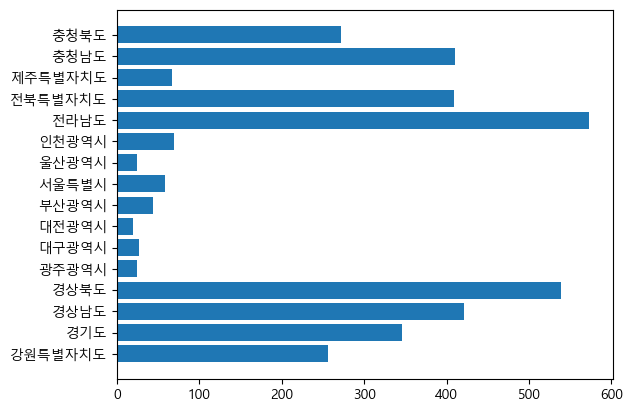

In [19]:
plt.barh(group.index, group.values)
plt.show()

In [20]:
filt = local['시도'] == '인천광역시'
local1 = local[filt]
local1.head()

,시도,군구,count,총인구수,ratio
시도군구,,,,,
인천광역시 강화군,인천광역시,강화군,27,69013,39.123064
인천광역시 계양구,인천광역시,계양구,3,279708,1.072547
인천광역시 남동구,인천광역시,남동구,2,491660,0.406785
인천광역시 동구,인천광역시,동구,1,59325,1.685630
인천광역시 미추홀구,인천광역시,미추홀구,3,406937,0.737215


In [21]:
def custom_autopct(pct):
    return f'{pct:.0f}%' if pct>=3 else ''

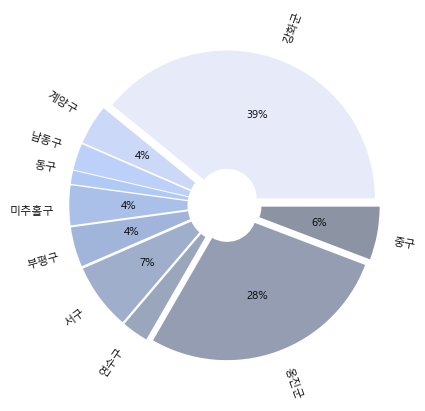

In [22]:
colors = ["#CED7F4", "#99B3F3", "#7AA3F5", "#6495ED","#5783D3","#446BB5",
          "#3E5E99","#374E7B","#2A3D64","#1A2A49",'#242D43','#242D43']
values = local1['count']
labels = local1['군구']
plt.pie(values, labels=labels, autopct=custom_autopct, rotatelabels=True,
        explode=[0.05] * len(local1), wedgeprops={'width':0.8, 'alpha':0.5},
        textprops={'fontsize':8}, colors=colors)

plt.show()